**INTRODUCCIÓN**
***

El objetivo de este proyecto es intentar responder a la siguiente pregunta: ¿Cuál sería el lugar ideal para vivir? No es una pregunta sencilla de responder a priori pero quizá, como hipótesis, se podría decir que el lugar ideal para vivir sería un pais desarrollado con datos positivos en sus variables que lo avalen. El proyecto se estructura en las siguientes partes: recopilación de los datos, limpieza de los mismos para su posterior utilización, análisis y conclusiones.

**DESCRIPCIÓN**
***

Primero, se hará la recopilación de los datos y para ello se usará una base de datos mundial (world-data-2023). Es importante conocer de antemano que, aunque esta base de datos es bastante completa, siempre podríamos encontrar nuevas características que se puedan usar para comparaciones, además de que cada año hay novedades, con lo cual es un proyecto que podría estar siempre en desarrollo. Después, se hará la limpieza de los datos, se creará una tabla explicando las variables y su importancia, se tipificarán los datos y, posteriormente, se pasará al análisis de forma individual y relacionando variables entre sí de forma numérica y visual. Por último, se hará una reflexión final con unas conclusiones.

**METODOLOGÍA**
***

Importamos las librerías necesarias.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr

Cargamos la base de datos en un dataframe.

In [ ]:
df_mundo = pd.read_csv('./data/world-data-2023.csv')

Exponemos la información general para tener una idea general de cómo esta la base de datos. Vemos variables, tipología, cantidad de valores nulos...

In [ ]:
df_mundo.info()

Se eliminan duplicados, variables que no vamos a usar para el análisis, tratamiento de valores nulos, se pasan los string a float (cambiando comas por números, eliminando caracteres que no sean números). Después, se tipifican las variables averiguando la cardinalidad. Todas las variables son numéricas porque la cardinalidad es mayor de 10 y continuas porque el porcentaje de cardinalidad es mayor del 30%. En el código encontraremos todo más detallado.  

In [ ]:
cardinalidad = df_mundo.nunique()
porcentaje_cardinalidad = (cardinalidad / len(df_mundo)) * 100
porcentaje_cardinalidad 

Empezamos con el análisis univariante. Hacemos uso de la desviación típica para averiguar si hay muchos valores dispersos, para comprobar si hay mucha o poca variación en el mundo. Después, haré un análisis bivariante para averiguar la correlación entre algunas variables, de forma general en el mundo, a través de la correlación de Pearson. 

A continuación muestro algunos ejemplos de cáculo de desviación típica y correlación de Pearson. 

In [ ]:
std_dev_f = df_mundo['Fertility Rate'].std()
std_dev_f

In [ ]:
correlation, p_value = pearsonr(df_mundo['Birth Rate'], df_mundo['Life expectancy'])
correlation

Por último, basándome en la media de cada variable, haré un ranking de países de mayor a menor calidad para vivir. Para ello, crearé una nueva columna en el dataframe, la cual llamaré "cantidad de 1". Si una variable positiva, en un país, es mayor de la media se sumará un 1 y si es una variable negativa, y el valor está por debajo de la media, se sumará un 1. El ranking se ordenará en función de la cantidad de 1 que tengan los países. A continuación, haré una clasificación en función de los países que sean aptos o no aptos para vivir (según su cantidad de 1) y, a su vez, cuál sería el mejor y el peor país para vivir.

In [ ]:
#asigno las variables positivas
variables_positivas = ['Agricultural Land( %)', 'Armed Forces size', 'Fertility Rate', 'Forested Area (%)', 'GDP',
                       'Gross primary education enrollment (%)','Gross primary education enrollment (%)',
                       'Life expectancy', 'Minimum wage', 'Physicians per thousand', 'Urban_population']
#asigno las variables negativas
variables_negativas = ['Density\n(P/Km2', 'Co2-Emissions', 'CPI', 'Gasoline Price', 'Infant mortality',
                       'Maternal mortality ratio', 'Out of pocket health expenditure', 'Unemployment rate' ]

#calculo las medias de todas las variables de tipo float
df_mundo.select_dtypes(include=['float']).mean()

#creo la variable 'cantidad de 1' y la inicializo en 0
df_mundo['cantidad de 1'] = 0

#creo un bucle for para poder comparar cada variable de cada pais con la media de esa variable en todo el dataframe
for col in df_mundo.select_dtypes(include=['float']).columns:
    if col != 'Country': # si es una columna que no sea country
        mean = df_mundo[col].mean() #declaramos la media
        if col in variables_positivas: #primero empezamos con las variables positivas
            df_mundo.loc[df_mundo[col] > mean, 'cantidad de 1'] += 1 #si el valor es mayor de la media, se suma un 1 al contador en la variable cantidad de 1
        elif col in variables_negativas: #después continuamos con las variables negativas
            df_mundo.loc[df_mundo[col] < mean, 'cantidad de 1'] += 1 #si el valor es menor de la media, se suma un 1 al contador en la variable cantidad de 1

#esto me sirve para que me aparezcan las 112 filas del dataframe, para ver todos los países
pd.set_option('display.max_rows', 112) 

#creamos un ranking ordenado de mayor a menor (en función del número de 1 sumados en la variable 'cantidad de 1')
df_mundo.groupby('Country')['cantidad de 1'].sum().sort_values(ascending=False)

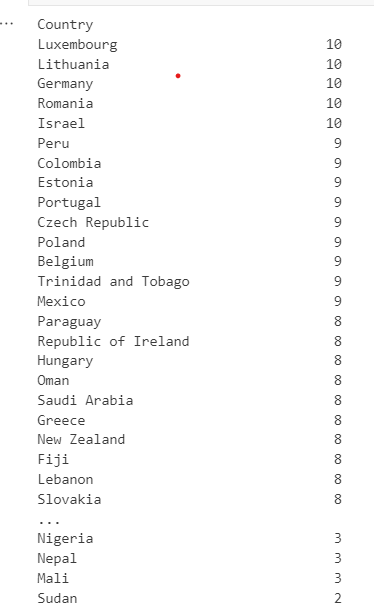

Creo una escala para saber qué países se considerarían aptos para vivir (si tienen más de un 6 en la cantidad de 1) y para ello creo una nueva variable 'apto', con dos posibles valores: apto (si es mayor o igual que 6) o 'no apto (en el resto de casos).

In [ ]:
df_mundo['apto'] = df_mundo['cantidad de 1'] >= 6
df_mundo['apto'] = df_mundo['apto'].replace({True: 'Apto', False: 'No apto'})

df_mundo[['Country', 'cantidad de 1', 'apto']]

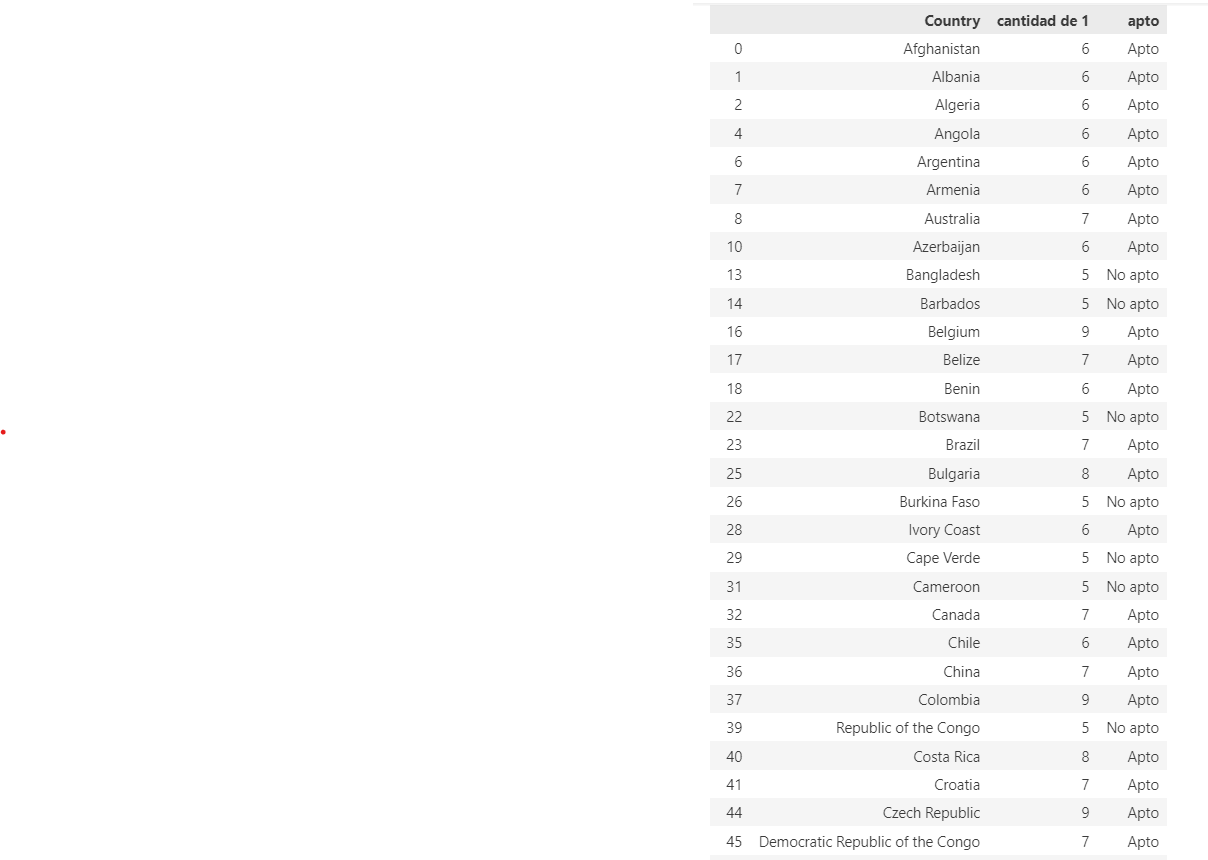

De forma más visual, se muestra la representación de la proporción de países aptos y no aptos. 

In [ ]:
ax = df_mundo['apto'].value_counts().plot(kind='bar')
ax.set_xlabel('')
ax.set_ylabel('Países')
ax.set_title('Países aptos y no aptos')
plt.show()

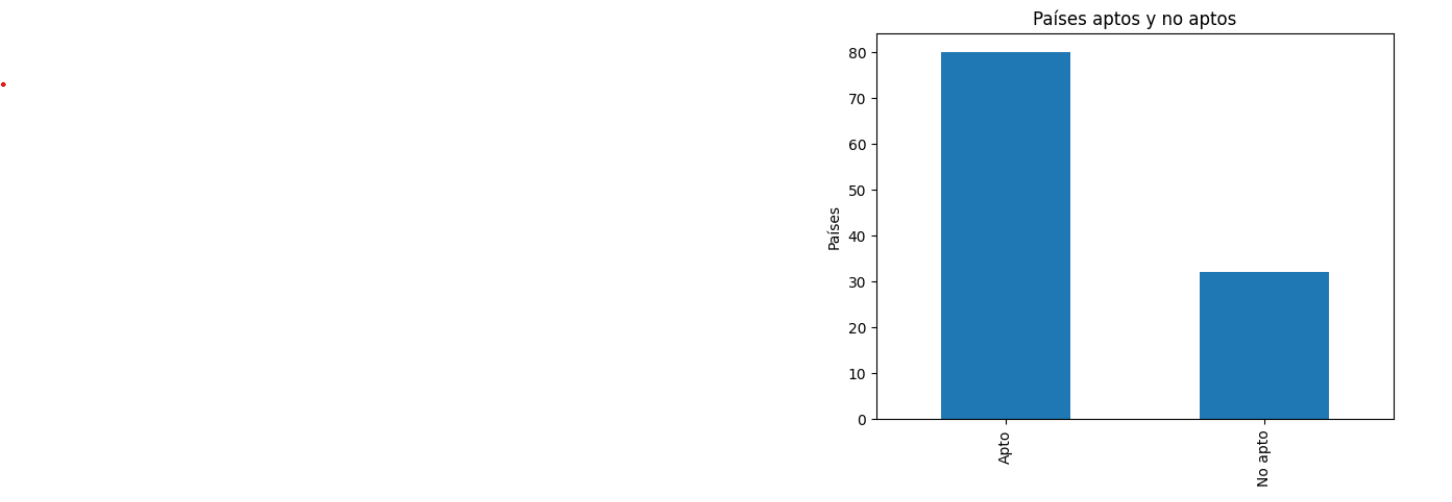

De forma gráfica, observamos los países menos aptos y los países más aptos.

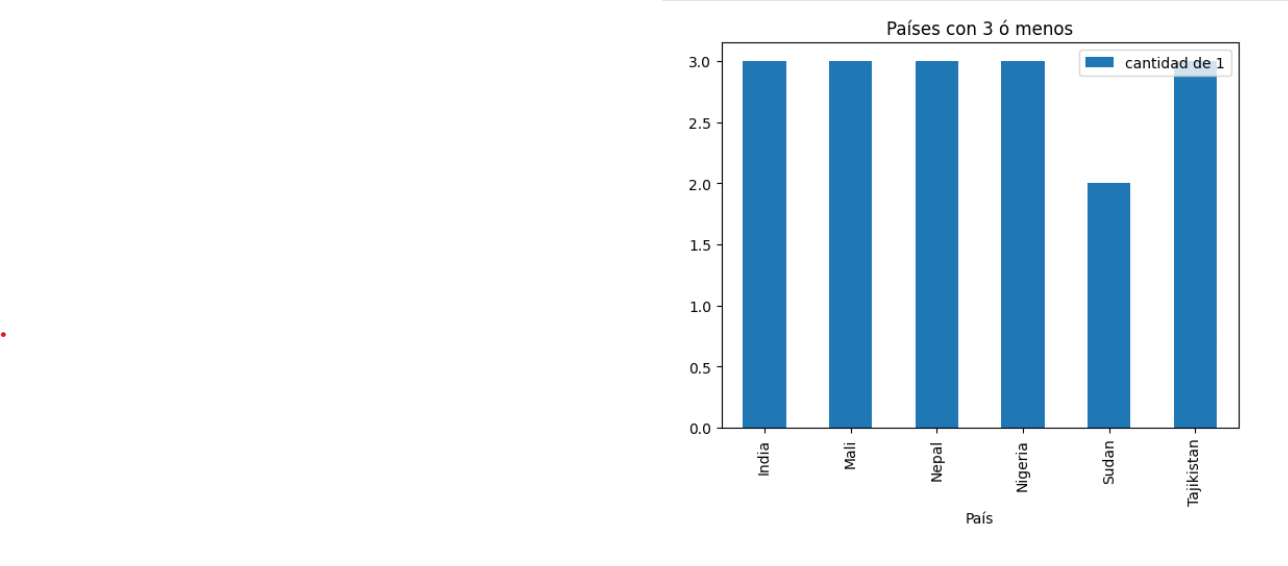

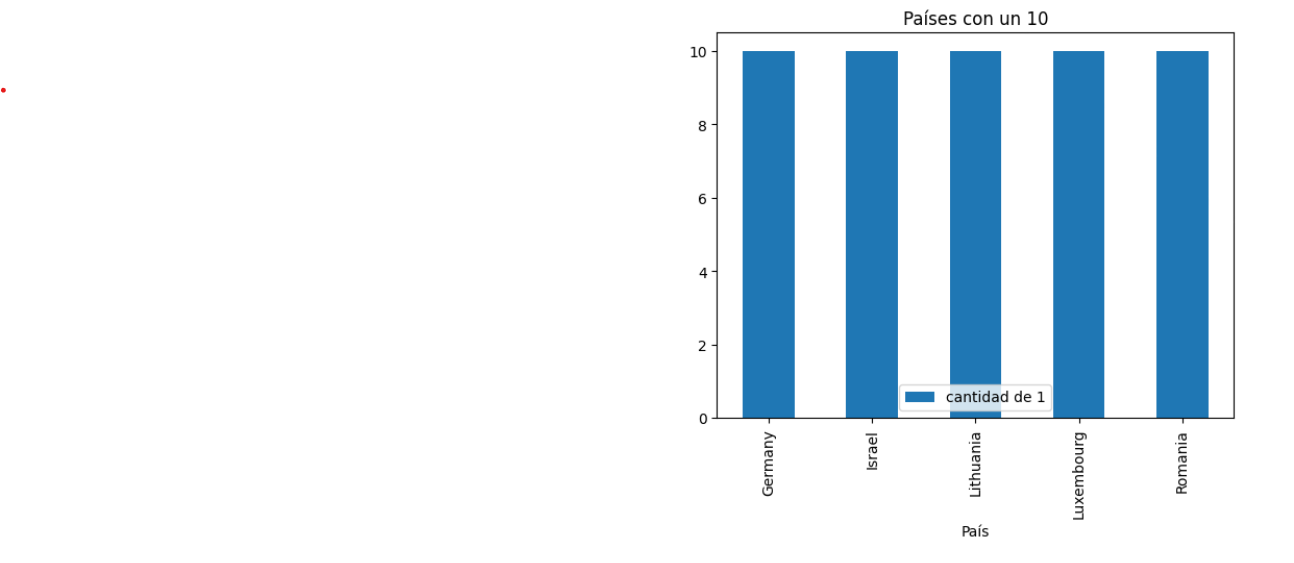

**RESULTADOS OBTENIDOS**
***

En base a los resultados obtenidos, destacaría que la fertilidad, la natalidad, la cantidad de médicos, la esperanza de vida, la tasa de desempleo y la educación primaria son parecidas en todo el mundo ya que la desviación típica es menor del 15%. Sin embargo, diría que la mortalidad infantil, el gasto en salud por persona y la educación terciaria es más diferente en el mundo ya que su desviación típica es mayor del 15%, incluso la educación terciaria diría que hay bastante diferencia ya que está rozando la desviación típica el 30%. En cuanto al IPC se diría que la diferencia es bastante alta ya que nos encontramos con una desviacion del 60%. Y, por último, las diferencias enormes que se pueden observar son las emisiones de CO2, el tamaño de las fuerzas armadas, la población urbana y la tasa de mortalidad materna.

Teniendo en cuenta la correlación entre variables, se puede decir que las tasas de mortalidad infantil y materna se relacionan de forma directa, y lo mismo ocurre con las tasas de natalidad y mortalidad infantil, además de que altas tasas de natalidad y de mortalidad influyen negativamente en la esperanza de vida. A mayor fertilidad, supone mayor natalidad y más cantidad de médicos implica mayor esperanza de vida. Se observa también que prácticamente no hay diferencia en el mundo en el acceso a la educación primaria, pero sí en la educación superior, y esta última también supone un aumento de la esperanza de vida. Existe una correlación positiva entre el acceso a la educación terciaria y la tasa de desempleo, pero es mínima. Y lo mismo ocurre con el acceso a la educación primaria pero al contrario. Esto puede significar que es mínimamente más sencillo encontrar trabajo solo con la educación primaria y que el acceder a una educación superior no garantiza mayores oportunidades de empleo, de hecho podríamos decir que, aunque de forma mínima, no es una ventaja. 

En base al ranking establecido en 6 para que un país sea considerado apto para vivir, se observa que hay una mayoría de países aptos y que cinco consiguen la máxima puntuación: Alemania, Luxemburgo, Lituania, Israel y Rumanía.

**CONCLUSIONES**
***

Recuperando el objetivo inicial del proyecto que era responder a la gran pregunta: ¿cuál es el mejor lugar para vivir? nos encontramos en la tesitura de que no existe un lugar ideal para vivir. Las características de un país dependen de multitud de factores que es imposible reflejar solo con unos datos, además de que siempre nos encontramos con la subjetividad enorme de los ojos de quien lo mire. A fin de cuentas, ¿qué es lo que buscamos para estar o ser felices? En el mundo somos tantas y tantas personas, que es muy probable que cada una midamos las variables de forma muy diferente porque al final todo depende del prisma con el que se mire.

Quizá para una persona sea muy importante que un país tenga mucha vegetación y quizá para otra persona que busque estar en una gran urbe no le da tanta importancia a un factor como las emisiones de CO2. Quizá también nos encontremos con alguien que no quiera tener hijos y por ello le de igual la natalidad de un país o incluso, si nos fijamos en la desigualdad de riqueza en el mundo, no creo que una persona millonaria se fije mucho en la tasa de desempleo de un país al que este optando para vivir.

Sin embargo, como todo en la vida, este proyecto también tiene una parte de subjetividad: la mía. Considero que lugares con una tasa de desempleo baja, con amplias zonas forestales, con baja mortalidad, con un acceso a la educación factible, con una sanidad pública y suficiente y con una gran esperanza de vida, son factores fundamentales para vivir una vida plena, saludable y feliz. En base a ello, he descubierto que países como Alemania, Luxemburgo, Lituania, Israel y Rumanía cumplirían con esas expectativas. A pesar de ello, creo que no eligiría ninguno de esos países como mi lugar ideal para vivir y si, ni yo misma he averiguado mi lugar ideal, dudo que un planeta entero se pusiera de acuerdo para lograrlo.

Al fin y al cabo, solo somos un puntito más en medio de algo muy grande y al final, el lugar ideal no existe, solo nos pasamos la vida intentando encontrarlo.